# MNIST Classification Demo

**Author:** Vlad Skrynyk

**Description:** This notebook demonstrates the MNIST classification using Random Forest, Feed-Forward Neural Network and Convolutional Neural Network. It includes data preprocessing, model training and evaluation.


# 1. Importing Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sys
import os
import cv2

sys.path.append(os.path.abspath(".."))

from models.random_forest import RandomForestMnist
from models.feed_forward_nn import FeedForwardNNMnist
from models.cnn import CNNMnist

from models.classifier import MnistClassifier


# Auxilary functions

In [33]:
# Function to plot sample images
def plot_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Main code and results

Sample MNIST Images:


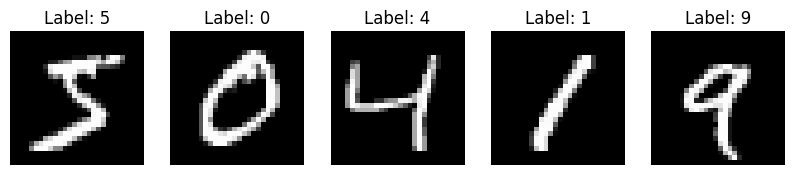

In [34]:
# Loading and Preprocessing Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

# Visualizing Sample Data
print("Sample MNIST Images:")
plot_sample_images(X_train, y_train)

Training Random Forest...
Training completed!
Predicting with Random Forest...


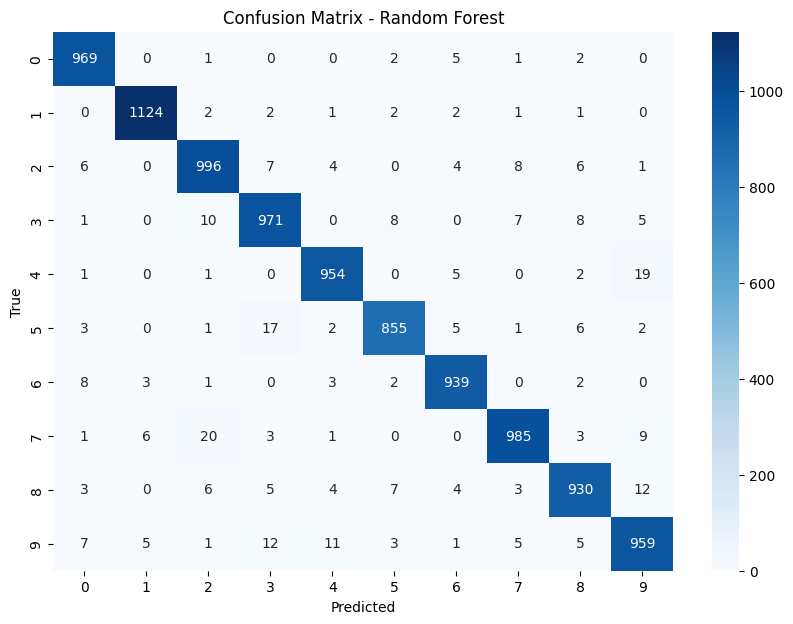

In [35]:
# ------------------ RANDOM FOREST ------------------
rf_model = RandomForestMnist(n_estimators=100)
rf_model.train(X_train_flattened, y_train)
y_pred_rf = rf_model.predict(X_test_flattened)

# Evaluate and plot results
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Training Feed-Forward Neural Network...
train nn
Epoch 1/10


c:\Users\skryn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8768 - loss: 0.4290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0.1175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9762 - loss: 0.0817
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9824 - loss: 0.0579
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0430
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9893 - loss: 0.0340
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0226
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0172
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9960 - loss: 0.0140
predict nn
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


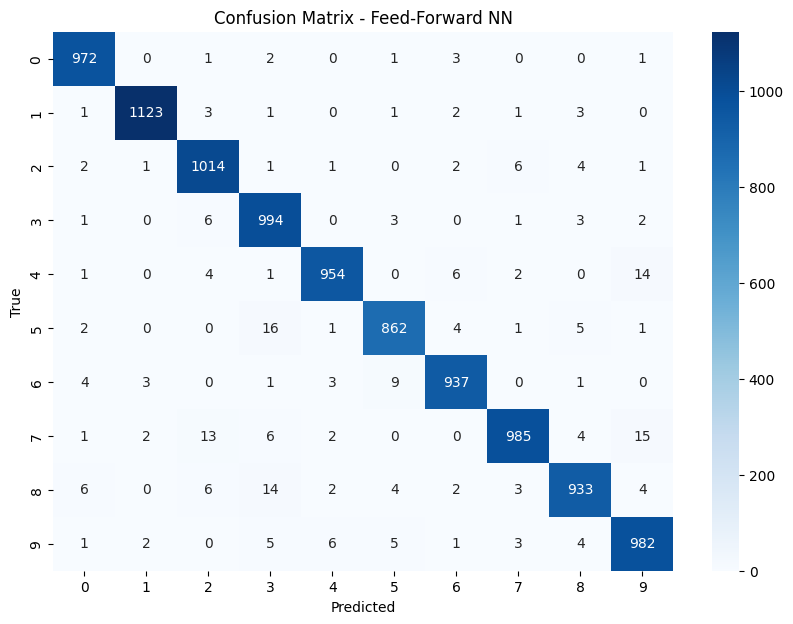

In [36]:
# ------------------ FEED-FORWARD NEURAL NETWORK ------------------
print("\nTraining Feed-Forward Neural Network...")
ff_model = FeedForwardNNMnist()
ff_model.train(X_train, y_train)
y_pred_ff = ff_model.predict(X_test)
y_pred_ff_labels = np.argmax(y_pred_ff, axis=1)  # Convert probabilities to labels

# Evaluate and plot results
plot_confusion_matrix(y_test, y_pred_ff_labels, "Feed-Forward NN")


Training CNN...
train cnn
Epoch 1/5


c:\Users\skryn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9017 - loss: 0.3155
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9897 - loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9931 - loss: 0.0213
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9947 - loss: 0.0168
predict cnn
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


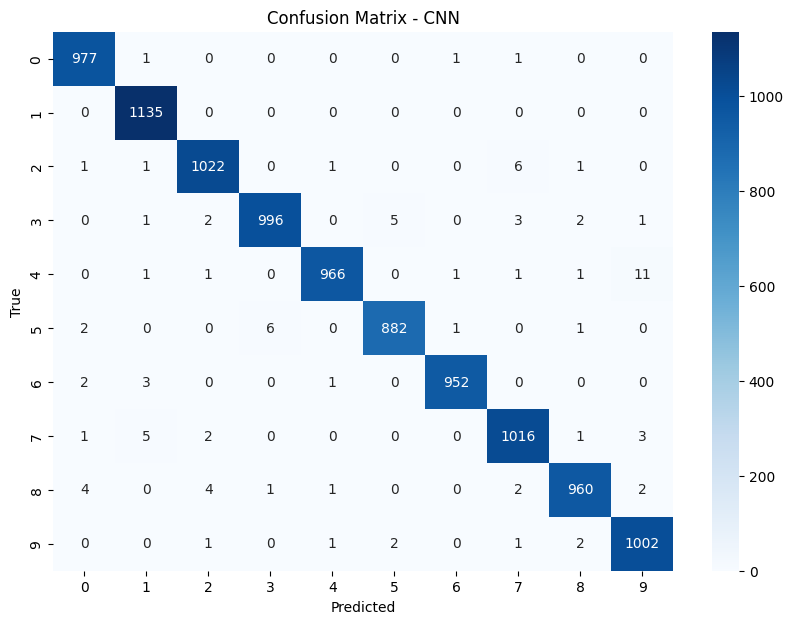

In [37]:
# ------------------ CONVOLUTIONAL NEURAL NETWORK (CNN) ------------------
print("\nTraining CNN...")
cnn_model = CNNMnist()
cnn_model.train(X_train, y_train)
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Evaluate and plot results
plot_confusion_matrix(y_test, y_pred_cnn_labels, "CNN")

In [38]:
# Function to process images from test_data folder
def predict_from_test_images(algorithm='rf', folder_path='../test_data/'):
    classifier = MnistClassifier(algorithm=algorithm)

    print(f"Training model: {algorithm}")
    
    # Prepare input data for specific models
    if algorithm == "rf":
        X_train_processed = X_train.reshape(len(X_train), 28*28)
        X_test_processed = X_test.reshape(len(X_test), 28*28)
    else:
        X_train_processed = X_train.reshape(-1, 28, 28, 1)
        X_test_processed = X_test.reshape(-1, 28, 28, 1)
    
    classifier.train(X_train_processed, y_train)
    classifier.test(X_test_processed, y_test)

    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28)) / 255.0
            images.append(img)
            filenames.append(filename)
    
    images = np.array(images)
    if algorithm == 'rf':
        images = images.reshape(len(images), 28*28)
    else:
        images = images.reshape(-1, 28, 28, 1)
    
    predictions = classifier.predict(images)
    if algorithm in ['nn', 'cnn']:
        predictions = np.argmax(predictions, axis=1)
    
    for filename, pred in zip(filenames, predictions):
        print(f"Image: {filename}, Predicted Label: {pred}")
    

# Run predictions on test images
for model in ['rf', 'nn', 'cnn']:
    predict_from_test_images(model)

Training model: rf
Training Random Forest...
Training completed!
Testing Random Forest...
Test accuracy: 0.9694
Predicting with Random Forest...
Image: image_1.png, Predicted Label: 3
Image: image_10.png, Predicted Label: 3
Image: image_2.png, Predicted Label: 2
Image: image_3.png, Predicted Label: 3
Image: image_4.png, Predicted Label: 7
Image: image_5.png, Predicted Label: 0
Image: image_6.png, Predicted Label: 8
Image: image_7.png, Predicted Label: 7
Image: image_8.png, Predicted Label: 5
Image: image_9.png, Predicted Label: 7
Training model: nn
train nn
Epoch 1/10


c:\Users\skryn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8781 - loss: 0.4275
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9642 - loss: 0.1222
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0805
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0416
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9893 - loss: 0.0356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0288
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9936 - loss: 0.0220
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9950 - loss: 0.0178
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9957 - loss: 0.0150
test nn
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9752 - loss: 0.0931
predict nn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/s

c:\Users\skryn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9062 - loss: 0.3100
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9859 - loss: 0.0448
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9904 - loss: 0.0308
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9937 - loss: 0.0206
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0165
test cnn
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0352
predict cnn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image: image_1.png, Predicted Label: 3
Image: image_10.png, Predicted Label: 3
Image: image_2.png, Predicted Label: 2
Image: image_3.png, Predicted Label: 3
Image: image_4.png, Predicted Label: 7
Image: image_5.png, Predicted Label: 0
Image: image_6.png, Predicted Label: 8
Image: image_7.png, Predicted Label: 7
Image: image_8.png, Predicted Label: 5
Image: image_9.png, Predicted Label: 7
